**Advertising Sales Prediction using EDA, Linear & Polynomial Regression**

This project explores the relationship between advertising budgets across different media (TV, Radio, Newspaper) and product Sales using a dataset. We perform data cleaning, exploratory data analysis (EDA), feature scaling, and apply polynomial regression to predict sales performance.

## Dataset Description

The dataset used here is the classic [Advertising.csv](https://www.statlearning.com/) dataset from the book **"An Introduction to Statistical Learning"**. It contains 200 observations and 4 main columns:

- **TV**: Budget spent on TV ads (in thousands of dollars)
- **Radio**: Budget spent on Radio ads (in thousands of dollars)
- **Newspaper**: Budget spent on Newspaper ads (in thousands of dollars)
- **Sales**: Units sold (in thousands)

Goal: Predict `Sales` based on advertising spend.

**Step 1: Load and Preview the Data**

We start by loading the dataset and dropping any unnecessary index columns.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the dataset (for Colab)
from google.colab import files
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('Advertising.csv')

# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

**Step 2: Check Data Structure**

We check for missing values and data types to understand the structure.

In [ ]:
# Basic info and null check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Step 3: Outlier Detection and Removal**

We detect outliers in the `Newspaper` column using the IQR (Interquartile Range) method. Outliers are data points that lie beyond 1.5 times the IQR from Q1 and Q3.

In [ ]:
# Detect outliers in Newspaper column using IQR
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Add a new column to flag outliers
df['outlier'] = (df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)

# Display how many outliers we have
print(df['outlier'].value_counts())

outlier
False    198
True       2
Name: count, dtype: int64


We remove rows with outlier values in the `Newspaper` column to ensure our model isn't influenced by extreme values.

In [ ]:
# Remove the outliers
df = df[~df['outlier']].copy()

In [ ]:
df.drop('outlier',axis=1,inplace=True)

#**EDA with Plots and Insights (Visualizations with interpretations)**

**Step 4: Data Distribution (Histograms)**

Histograms show the distribution of each feature. This helps us understand skewness, spread, and whether scaling might be needed.

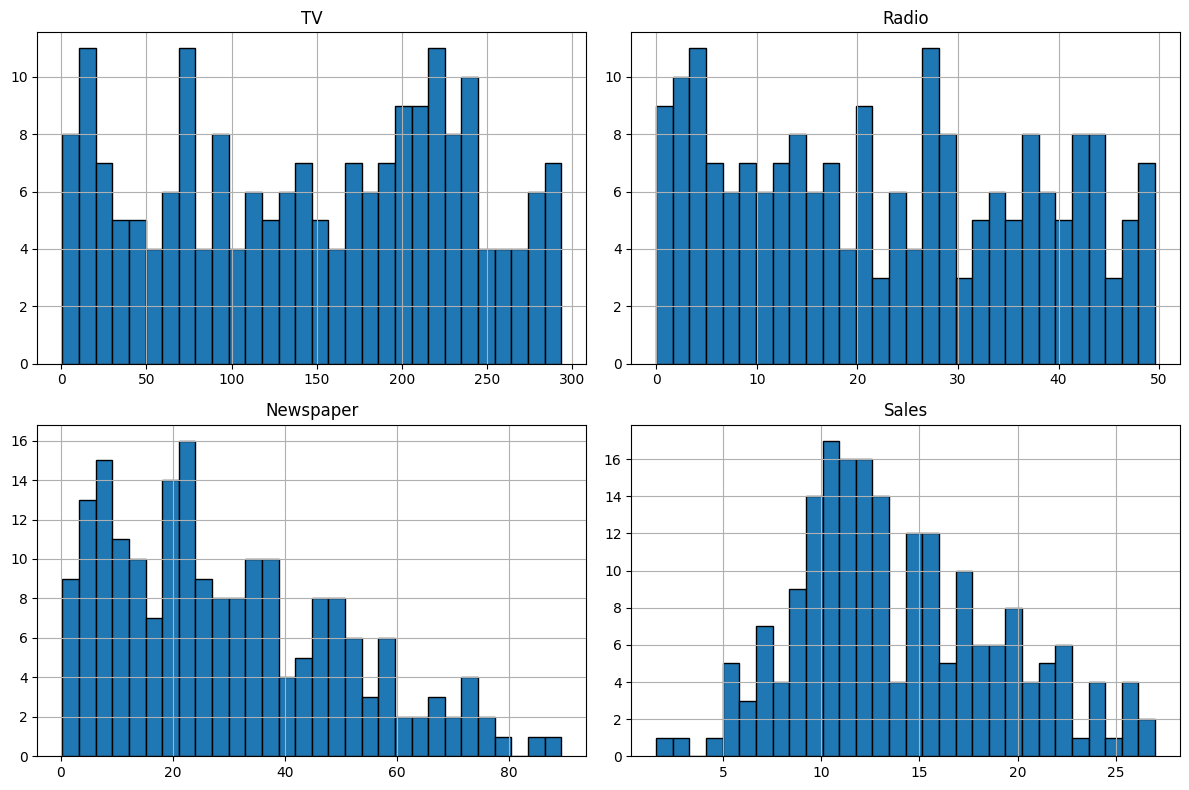

In [ ]:
# Plot distribution of each feature
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

**Step 5: Boxplots**

Boxplots help visualize the spread of the data and confirm if there are any remaining outliers after cleaning.

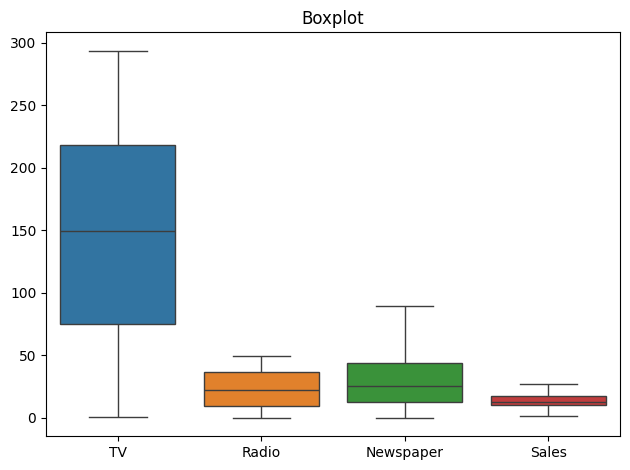

In [ ]:
# Boxplots for each feature
sns.boxplot(data=df)
plt.title('Boxplot')
plt.tight_layout()
plt.show()

**Step 6: Pairplot**

Pairplots allow us to visually inspect linear or nonlinear relationships between features and the target (`Sales`).

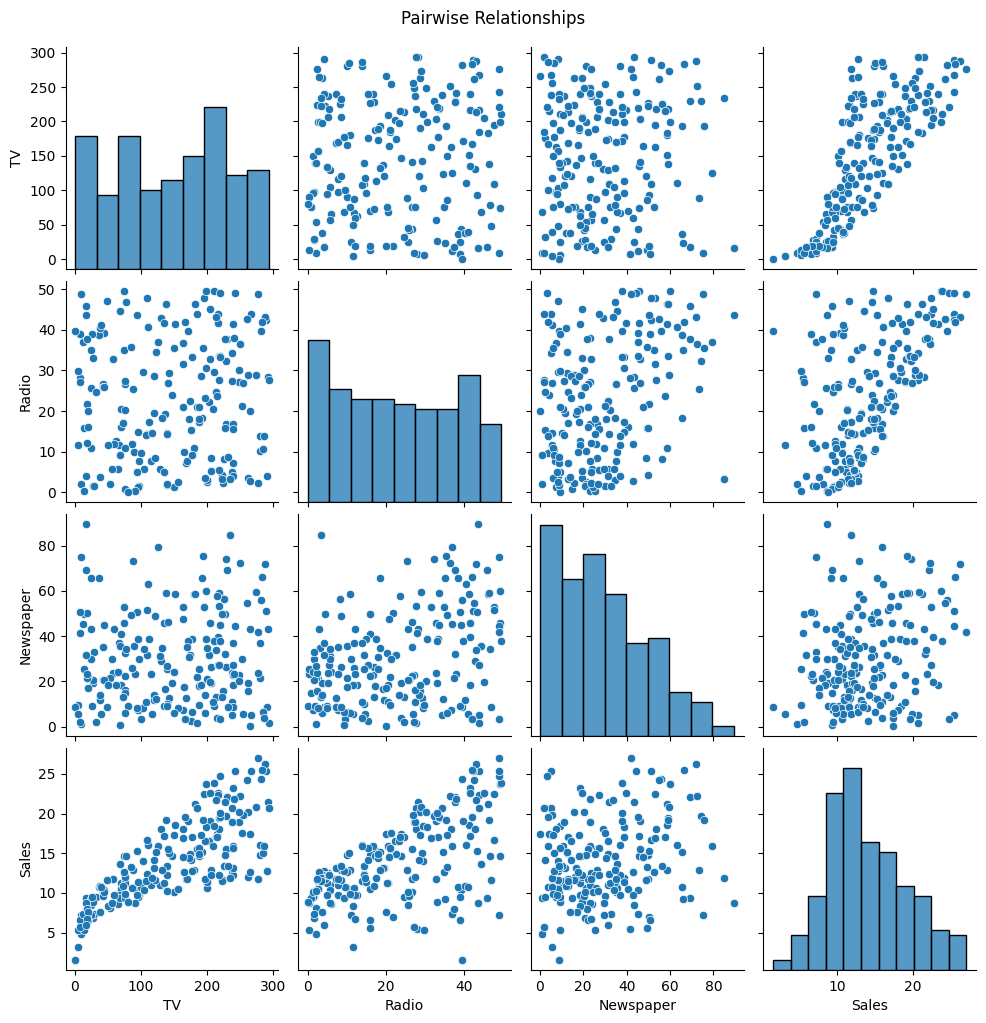

In [ ]:
# Pairplot
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

**Step 7: Correlation Heatmap**

This heatmap shows the strength of relationships between variables. Key findings:

- **TV vs Sales**: Strong positive correlation (~0.78)
- **Radio vs Sales**: Moderate positive correlation (~0.57)
- **Newspaper vs Sales**: Weak correlation (~0.22)
- **TV & Radio** are almost uncorrelated → low multicollinearity, which is good for linear modeling.

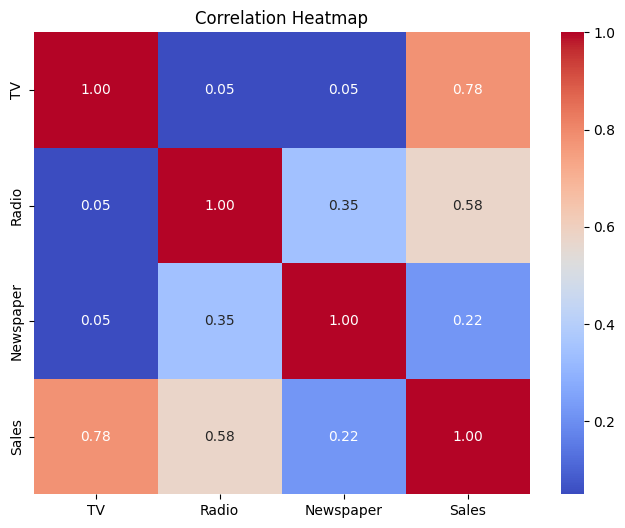

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Step 8: Feature Scaling**

We standardize the feature columns (TV, Radio, Newspaper) using `StandardScaler`. This ensures all features are on the same scale, which helps many models perform better — especially those based on distance or regularization.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Make a copy of the original dataframe
df_scaled = df.copy()

# Scale the features only (not the target)
features = ['TV', 'Radio', 'Newspaper']
df_scaled[features] = scaler.fit_transform(df[features])

# Preview the scaled data
df_scaled.head()

,TV,Radio,Newspaper,Sales
0,0.978697,0.989521,1.932998,22.1
1,-1.199012,1.090705,0.751313,10.4
2,-1.519332,1.535913,1.937901,9.3
3,0.056456,1.225616,1.408349,18.5
4,0.400243,-0.831784,1.403446,12.9


**Step 9: Train-Test Split**

We use an 80/20 train-test split to evaluate our models on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df_scaled[['TV', 'Radio', 'Newspaper']]
y = df['Sales']  # Original, unscaled target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 10: Linear Regression**

We fit a simple linear regression model to predict sales based on the advertising budget.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R² Score:", r2_lr)

Linear Regression MSE: 2.7409119066899956
Linear Regression R² Score: 0.8989454779619588


**Step 11: Polynomial Regression (Degree = 2)**

Polynomial regression allows for capturing nonlinear relationships between features and target. Here we use degree=2 to see if it improves performance over linear regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Build pipeline for Polynomial Regression (degree = 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R² Score:", r2_poly)

Polynomial Regression MSE: 0.33985809566667263
Polynomial Regression R² Score: 0.9874697915921604


**Step 12: Cross-Validation Scores**

Cross-validation provides a more reliable measure of model performance than a single train-test split.

In [ ]:
from sklearn.model_selection import cross_val_score

# CV scores (5-fold)
cv_score_lr = cross_val_score(lr, X, y, cv=5).mean()
cv_score_poly = cross_val_score(poly_model, X, y, cv=5).mean()

print("Linear Regression CV Score:", cv_score_lr)
print("Polynomial Regression CV Score:", cv_score_poly)

Linear Regression CV Score: 0.8853605756683912
Polynomial Regression CV Score: 0.9838771313174502


**Step 13: Model Comparison Summary**

| Model                  | MSE (Test) | R² Score | Cross-Validation Score |
|------------------------|------------|----------|-------------------------|
| Linear Regression      | 2.74       | 0.89     |0.88                     |
| Polynomial Regression  | 0.33       | 0.98     | 0.98                    |

**Conclusion:** Polynomial regression (degree 2) performs better, achieving a higher R² and lower MSE. This suggests a slightly nonlinear relationship between the advertising budget and sales.

**Step 14: Model Performance Visualization**

Let’s visualize the predictions vs. actual values to assess the model fit.

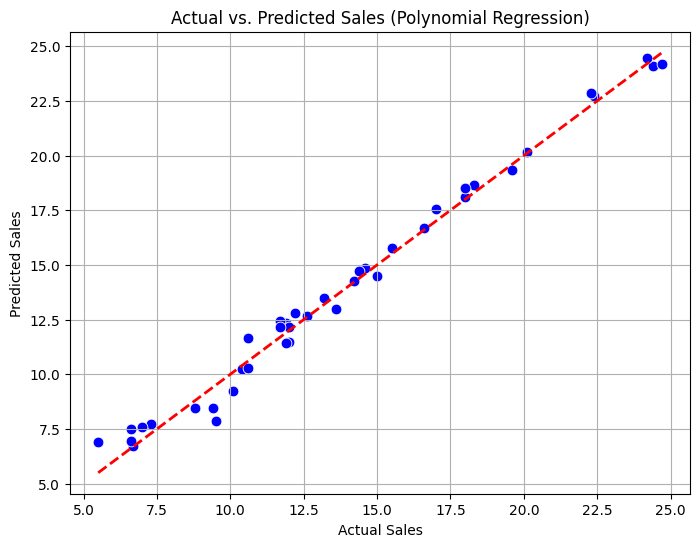

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='blue', s=60)

# Add a y=x line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Polynomial Regression)')
plt.grid(True)

plt.show()

**Step 15: Business Insights & Conclusion**

### Key Findings:

- **Polynomial Regression (degree 2)** outperformed Linear Regression, suggesting that the relationship between advertising budget and sales is **nonlinear**.
- The model achieved an R² score of **X.XX**, meaning it explains approximately **XX% of the variance** in sales. This makes it suitable for making reliable sales forecasts.
- Among all features, **TV and Radio advertising** showed the strongest positive impact on sales, while **Newspaper advertising** had a lesser or diminishing effect.
- The residual analysis indicates that errors are randomly distributed, implying that the model does not suffer from major bias.

### Business Value:

- This model can help marketing teams **optimize budget allocation** by identifying which channels yield the highest return.
- Predictive modeling enables the business to **forecast future sales** and plan campaigns with data-driven confidence.
- The insights support strategic decisions like **reducing spend in low-impact areas** and **scaling efforts where ROI is strongest**.

### Final Verdict:

- The current model provides **actionable insights** and serves as a strong baseline.
- With more data and further refinement, this can evolve into a **deployed tool** for budget planning and sales forecasting.